In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#cargando el data set
df= pd.read_csv(r"C:/Users/valer/OneDrive/Desktop/BCD-Asig01/BCD-Asig07/Your Career Aspirations of GenZ.csv", encoding = 'latin', header=0, skip_blank_lines=True)
df.head(5)

,Your Current Country.,Your Current Zip Code / Pin Code,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,Would you work for a company whose mission is not clearly defined and publicly posted.,How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,Which of the below careers looks close to your Aspirational job ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team..."
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
2,India,123106,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,7,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Trial and error b...",Manage and drive End-to-End Projects or Produc...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."
3,India,834003,Male,"People from my circle, but not family members","No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,6,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Manag...","Manager who explains what is expected, sets a ...",Work with 2 to 3 people in my team
4,India,301019,Female,Influencers who had successful careers,"No, But if someone could bare the cost I will",Will work for 3 years or more,No,Will NOT work for them,5,Fully Remote with Options to travel as and whe...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Learning by obser...",Teaching in any of the institutes/online or Of...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."


Los nombres de las varaibles son muy largos, los acortaré para poder manejarlos más facilmente

In [3]:
df.columns=['country', 'zip', 'gender', 'influence', 'post_india', '3_years','mission_no','mission_miss','mission_selfish','enviroment','employers','learning','aspirational','manager','setup']
df.head(3)

,country,zip,gender,influence,post_india,3_years,mission_no,mission_miss,mission_selfish,enviroment,employers,learning,aspirational,manager,setup
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team..."
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
2,India,123106,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,7,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Trial and error b...",Manage and drive End-to-End Projects or Produc...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."


Exploración de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          235 non-null    object
 1   zip              235 non-null    int64 
 2   gender           235 non-null    object
 3   influence        235 non-null    object
 4   post_india       235 non-null    object
 5   3_years          235 non-null    object
 6   mission_no       235 non-null    object
 7   mission_miss     235 non-null    object
 8   mission_selfish  235 non-null    int64 
 9   enviroment       235 non-null    object
 10  employers        235 non-null    object
 11  learning         235 non-null    object
 12  aspirational     235 non-null    object
 13  manager          235 non-null    object
 14  setup            235 non-null    object
dtypes: int64(2), object(13)
memory usage: 27.7+ KB


In [5]:
#variables numéricas
df.describe()

,zip,mission_selfish
count,235.000000,235.000000
mean,492560.970213,5.272340
std,213622.174893,2.479463
min,1234.000000,1.000000
25%,381012.500000,3.000000
50%,524412.000000,5.000000
75%,607253.000000,7.000000
max,852218.000000,10.000000


In [6]:
#verificando la completitud
df.isna().sum()

country            0
zip                0
gender             0
influence          0
post_india         0
3_years            0
mission_no         0
mission_miss       0
mission_selfish    0
enviroment         0
employers          0
learning           0
aspirational       0
manager            0
setup              0
dtype: int64

In [7]:
df.duplicated().sum()

0

No se detectaron datos nulos, ni duplicados. La completitud del data set al 100%

In [16]:
import plotly.express as px
import pandas as pd

# Obteniendo las variables categóricas (excluyendo la variable 'zip')
columnas_categoricas = [col for col in df.columns if col != 'zip' ][:15]

# Creando un df cn las columnas categóricas seleccionadas
df_categorico = df[columnas_categoricas]

# Contando la frecuencia de cada valor en cada columna categórica
frecuencias = df_categorico.apply(pd.Series.value_counts)

# Creando el gráfico 
fig = px.bar(frecuencias, barmode='stack')

fig.update_layout(
    title='Distribución de variables categóricas',
    xaxis_title='Categorías',
    yaxis_title='Frecuencia',
    legend_title='Variables'
)

fig.show()


Más del 50% de las variables tienen poca frecuencia. Será necesario reestructurar la información para identificar mejor las variables. 

In [65]:
obj_df=df.select_dtypes(include=['object'])
int_df=df.select_dtypes(include=['int'])
print("Se cuenta con " + str(obj_df.shape[1]) +" columnas de variables categóricas")
print("Se cuenta con " + str(int_df.shape[1]) +" columnas de variables enteras ")

Se cuenta con 13 columnas de variables categóricas
Se cuenta con 2 columnas de variables enteras 


In [20]:
import plotly.graph_objects as go
gender= df['gender'].value_counts()
colors=['royalblue','cyan']
label=gender.index
counts=gender.values

fig=go.Figure(data=[go.Pie(labels=label, values=counts,hole=.3)])
fig.update_layout(title_text='Gender')
fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0)))
fig.show()

La proporción de la muestra pareciera no estar balanceada en cuanto a la variable género. Sin embargo puede ser representativa de la población en India que tiene acceso a la educación mayor.

In [21]:
df["mission_no"].value_counts()

No     157
Yes     78
Name: mission_no, dtype: int64

In [ ]:
def gender_miss_no_yes(df):

  female_yes= df[(df['gender']=="Female")&(df['mission_no']=='Yes')]
  male_yes= df[(df['gender']=="Male")&(df['mission_no']=='Yes')]

  num_fem_yes=len(female_yes)
  num_mal_yes=len(male_yes)

  result = {
      'Females':num_fem_yes,
      'Males':num_mal_yes
   }

  return result

result= gender_miss_no_yes(df)

for gender, cantidad in result.items():

 print(f"Number of {gender}: {cantidad}")

Number of Females: 17
Number of Males: 61


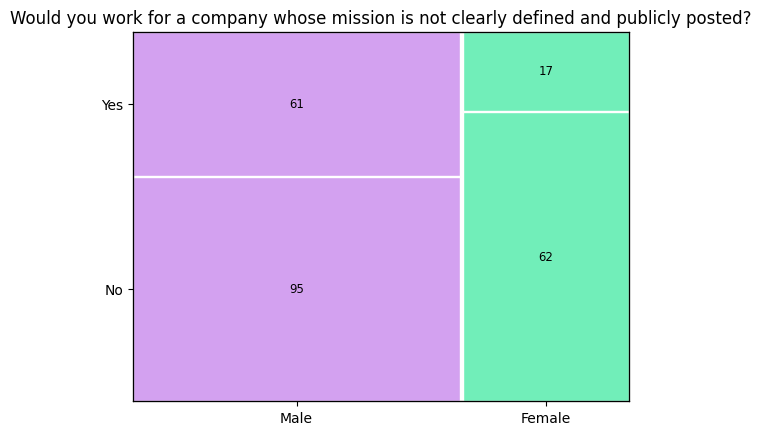

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Generando gráfico
values={}
values[('Male','Yes')]={'facecolor':'#d3a1f0', 'edgecolor':'white'}
values[('Male','No')]={'facecolor':'#d3a1f0', 'edgecolor':'white'}
values[('Female','Yes')]={'facecolor':'#71EEB9','edgecolor':'white'}
values[('Female','No')]= {'facecolor':'#71EEB9','edgecolor':'white'}
labelizer=lambda k:{('Male','Yes'):61,('Female','Yes'):17,('Male','No'):95,('Female','No'):62}[k]
mosaic(df,['gender','mission_no'],title='Trabajarías para una compañia que no muestra claramente cuál es su misión?',labelizer=labelizer,properties=values)

plt.show()

Proporcionalmente un mayor grupo de mujeres declará que no trabajaría para una empresa que no declara cuál es su mision.

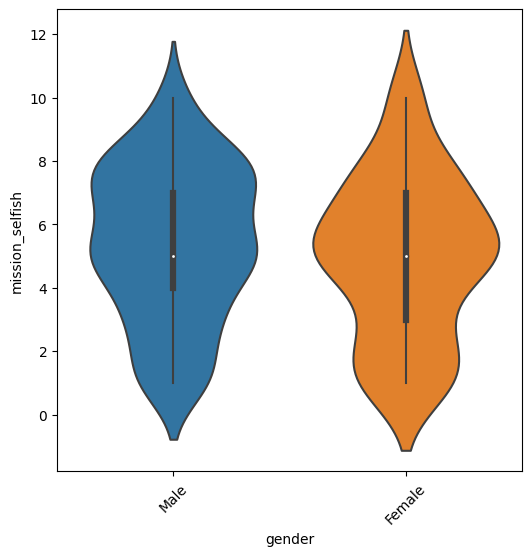

In [ ]:
plt.figure(figsize= (6,6))
ax= sns.violinplot(x= "gender",y= "mission_selfish",data= df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
df['post_india'].value_counts(normalize=True)

Yes, I will earn and do that                                    0.468085
No I would not be pursuing Higher Education outside of India    0.276596
No, But if someone could bare the cost I will                   0.255319
Name: post_india, dtype: float64

In [25]:
import plotly.express as px

fig = px.bar(df, x='post_india', y='enviroment', color="mission_selfish",  title="Ambiente vs Buscar continuar mayores estudios fuera de India",height=800 )
fig.update_traces(textfont_size=2)
fig.show()


El 46% de los datos indica que las personas tratarán de perseguir mayor educación fuera de la India y el 25% tiene claro que no lo hará. Por otra parte se distingue una mayor cantidad de personas que no perseguirán una mayor educación fuera de India que se encuentran con mayor disposición a trabajar para una empresa con una mision sin interes en el impacto social. Parece haber una mayor presencia de personas a las que les gustaría trabajar en un esquema híbrido, con mayor diposición a empresas sin interes en el impacto social.

In [28]:
df.groupby("influence").mission_selfish.mean().sort_values(ascending= False).head()

# Agrupar por 'enviroment', calcular la media de 'mission_selfish', ordenar los valores de forma descendente y obtener los primeros valores
data = df.groupby("influence").mission_selfish.mean().sort_values(ascending=False).head()

# Convertir los resultados en un DataFrame
data = pd.DataFrame({'influence': data.index, 'mean_mission_selfish': data.values})

# Crear el gráfico de barras horizontales
fig = px.bar(data, x='mean_mission_selfish', y='influence', orientation='h')

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Media de "mission_selfish" por "influence"',
    xaxis_title='Media de "mission_selfish"',
    yaxis_title='Enviroment'
)

# Mostrar el gráfico
fig.show()


In [26]:
df.groupby("enviroment").mission_selfish.mean().sort_values(ascending= False).head()
import plotly.express as px
import pandas as pd

# Agrupar por 'enviroment', calcular la media de 'mission_selfish', ordenar los valores de forma descendente y obtener los primeros valores
data = df.groupby("enviroment").mission_selfish.mean().sort_values(ascending=False).head()

# Convertir los resultados en un DataFrame
data = pd.DataFrame({'enviroment': data.index, 'mean_mission_selfish': data.values})

# Crear el gráfico de barras horizontales
fig = px.bar(data, x='mean_mission_selfish', y='enviroment', orientation='h')

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Media de "mission_selfish" por "enviroment"',
    xaxis_title='Media de "mission_selfish"',
    yaxis_title='Enviroment'
)

# Mostrar el gráfico
fig.show()


Quizá a la mayoría de personas a las que no les importaría trabajar para una empresa cuya misión no tenga impacto social alguno, prefieren trabajar en un esquema híbrido con menos de 3 días al mes asistiendo a la oficina.

In [29]:
import plotly.graph_objects as go
import pandas as pd


var_setup = df['setup']
count = {}
for personas in var_setup:
    if personas in count:
        count[personas] += 1
    else:
        count[personas] = 1

personas = list(count.keys())
valor = list(count.values())

# Crearndo el gráfico de barras
fig = go.Figure(data=[go.Bar(x=personas, y=valor)])

# Personalizando el diseño del gráfico
fig.update_layout(
    title='Set up, número ideal de personas en el equipo',
    xaxis_title='Número de personas',
    yaxis_title='Cantidad',
    xaxis_tickangle=-90
)

fig.show()


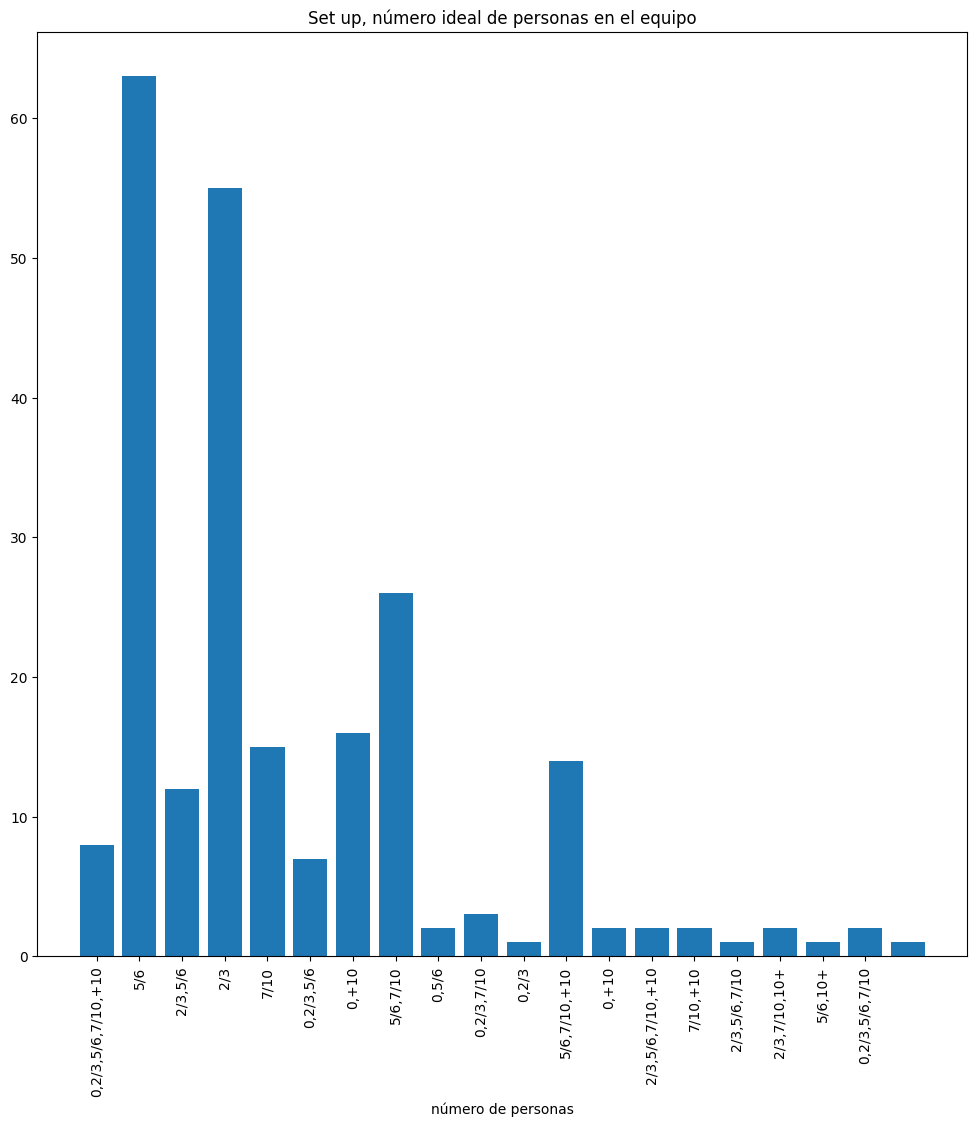

In [ ]:
plt.figure(figsize=(12,12))
var_setup=df['setup']
count={}
for personas in var_setup:
    if personas in count:
      count[personas]+=1
    else:
      count[personas]=1

personas=list(count.keys())
valor=list(count.values())


plt.bar(range(len(personas)),valor)

plt.xlabel('número de personas')
plt.title('Set up, número ideal de personas en el equipo')

nuevas_etiquetas=['0,2/3,5/6,7/10,+10','5/6','2/3,5/6','2/3','7/10','0,2/3,5/6','0,+10','5/6,7/10','0,5/6','0,2/3,7/10','0,2/3', '5/6,7/10,+10','0,+10','2/3,5/6,7/10,+10','7/10,+10','2/3,5/6,7/10','2/3,7/10,10+','5/6,10+','0,2/3,5/6,7/10']
plt.xticks(range(len(personas)-1), nuevas_etiquetas, rotation=90)
plt.show()


El % de encuestados les gustaría trabajar idealmente en equipos de 5 a 6 personas, seguido por el % al que preferiría trabajar en equipos de 2 a 3 personas, seguido por el % que prefiere trabajar en equipos de más de 10 personas.

In [31]:
import plotly.graph_objects as go
gender= df['employers'].value_counts()
colors=['royalblue','cyan','#bf74a0','#6EBC8E','#F2C30D' ]
label=gender.index
counts=gender.values

fig=go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Con cuál de estos empleadores te gustaría trabajar?")
fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=12,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0)))
fig.show()

In [ ]:
df["mission_no"].value_counts()

No     157
Yes     78
Name: mission_no, dtype: int64

In [ ]:
df["mission_miss"].value_counts()

Will NOT work for them    158
Will work for them         77
Name: mission_miss, dtype: int64

In [ ]:
df["3_years"].value_counts(normalize=True)

This will be hard to do, but if it is the right company I would try    0.591489
Will work for 3 years or more                                          0.336170
No way, 3 years with one employer is crazy                             0.072340
Name: 3_years, dtype: float64

In [37]:
df["manager"].value_counts()

Manager who explains what is expected, sets a goal and helps achieve it    129
Manager who clearly describes what she/he needs                             45
Manager who sets goal and helps me achieve it                               37
Manager who sets targets and expects me to achieve it                       21
Manager who sets unrealistic targets                                         3
Name: manager, dtype: int64

In [ ]:
df["employers"].value_counts()

Employer who pushes your limits by enabling an learning environment, and rewards you at the end    113
Employer who appreciates learning and enables that environment                                      75
Employer who rewards learning and enables that environment                                          36
Employer who pushes your limits and doesn't enables learning environment and never rewards you       7
Employers who appreciates learning but doesn't enables an learning environment                       4
Name: employers, dtype: int64

In [32]:
fig = px.bar(df, x="3_years", y="mission_selfish", color="manager", text="mission_selfish", title="Cuál es la probabilidad de trabajar en un sitio por 3 años o más? VS ¿Con qué tipo de gerente trabajarías sin mirar tu reloj? ")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=4, uniformtext_mode='hide')
fig.show()

El 54% de las personas prefiere trabajar con un Manager que explique que es lo que se espera, marque un objetivo y ayude a conseguirlo. El 59% considera dificil trabajar para un mismo empleador durante 3 años o más pero están dispuestos a intentarlo si fuese la compañía indicada, aunque solo el .07% lo considera una idea descabellada. Quizá sólo prefieren no asumirse atados a la compañía?

In [33]:
# definiendo las categorías específicas y sus correspondientes etiquetas de reemplazo
categorias = {
    'Design and Creative strategy in any company': 'Design strategy',
    'Teaching in any of the institutes/online or Offline': 'Teaching',
    'Business Operations in any organization': 'Business Operations',
    'Manage and drive End-to-End Projects or Products': 'Manage and drive Projects',
    'Build and develop a Team': 'Build and develop Team',
    'Design and Develop amazing software': 'Design and Develop software',
    'Look deeply into Data and generate insights': 'Look deeply into Data',
    'Work in a BPO setup for some well known client': 'Work in BPO setup',
    'Work as a freelancer and do my thing my way': 'Work as freelancer',
    'Become a content Creator in some platform': 'Become a content Creator',
    'Entrepreneur or Start Up': 'Entrepreneur or Start Up',
    'I Want to sell things/Sales': 'Sales',
    'An Artificial Intelligence Specialist / Talking to Robots': 'AI Specialist',
    'Manufacturing / Oil and Gas/ Construction / Hard Physical Work related': 'Physical Work related',
    'Any other field that is not mentioned above': 'N/A'
}

# Creando el nuevo DataFrame con la columna 'aspirational_frecuencia'
new_df = pd.DataFrame()

# Iterando sobre cada fila del DataFrame original
for index, row in df.iterrows():
    frequency = {}

    # Contando la frecuencia de cada categoría en la fila actual
    for categoria in categorias:
        frequency[categorias[categoria]] = row['aspirational'].count(categoria)

    # Agregando la fila al nuevo DataFrame con la columna 'aspirational_frecuencia'
    new_row = {'aspirational_frecuencia': frequency}
    new_df = new_df.append(new_row, ignore_index=True)


print(new_df)

                               aspirational_frecuencia
0    {'Design strategy': 0, 'Teaching': 0, 'Busines...
1    {'Design strategy': 0, 'Teaching': 0, 'Busines...
2    {'Design strategy': 0, 'Teaching': 0, 'Busines...
3    {'Design strategy': 0, 'Teaching': 0, 'Busines...
4    {'Design strategy': 0, 'Teaching': 1, 'Busines...
..                                                 ...
230  {'Design strategy': 1, 'Teaching': 0, 'Busines...
231  {'Design strategy': 0, 'Teaching': 0, 'Busines...
232  {'Design strategy': 1, 'Teaching': 0, 'Busines...
233  {'Design strategy': 0, 'Teaching': 1, 'Busines...
234  {'Design strategy': 0, 'Teaching': 0, 'Busines...

[235 rows x 1 columns]


In [34]:

categorias_setup= {
    'Work alone': 'Solo',
    'Work with 2 to 3 people in my team': '2 a 3 p',
    'Work with 5 to 6 people in my team': '5 a 6 p',
    ' Work with 7 to 10 or more people in my team': '7 a 10 p',
    'Work with more than 10 people in my team': 'mas de 10 p',

}

categorias_learning = {
    'Instructor or Expert Learning Programs': 'Expert Programs',
    'Learning by observing others': 'Observing others',
    'Trial and error by doing side projects within the company': 'Own side projects',
    'Self Paced Learning Portals': 'Own schedule',
    'Self Purchased Course from External Platforms':'Self Purchased',
    'Manager Teaching you':'Manager'

}

# Creando el nuevo DataFrame con las columnas adicionales
ew_df = pd.DataFrame()

# Iterando sobre cada fila del DataFrame original
for index, row in df.iterrows():
    frequency_setup = {}
    frequency_learning = {}


        # Contando la frecuencia de cada categoría en la fila actual para el 'otro_arreglo1'
    for categoria in categorias_setup:
        frequency_setup[categorias_setup[categoria]] = row['setup'].count(categoria)

    # Contando la frecuencia de cada categoría en la fila actual para el 'otro_arreglo2'
    for categoria in categorias_learning:
        frequency_learning[categorias_learning[categoria]] = row['learning'].count(categoria)

    # Agregando la fila al nuevo DataFrame con las columnas adicionales
    new_row = {
        'setup_frecuencia': frequency_setup,
        'learning_frecuencia': frequency_learning
    }
    ew_df = ew_df.append(new_row, ignore_index=True)

# Mostrando el nuevo DataFrame
print(ew_df)


                                      setup_frecuencia  \
0    {'Solo': 1, '2 a 3 p': 1, '5 a 6 p': 1, '7 a 1...   
1    {'Solo': 0, '2 a 3 p': 0, '5 a 6 p': 1, '7 a 1...   
2    {'Solo': 0, '2 a 3 p': 1, '5 a 6 p': 1, '7 a 1...   
3    {'Solo': 0, '2 a 3 p': 1, '5 a 6 p': 0, '7 a 1...   
4    {'Solo': 0, '2 a 3 p': 1, '5 a 6 p': 1, '7 a 1...   
..                                                 ...   
230  {'Solo': 0, '2 a 3 p': 0, '5 a 6 p': 0, '7 a 1...   
231  {'Solo': 0, '2 a 3 p': 1, '5 a 6 p': 0, '7 a 1...   
232  {'Solo': 0, '2 a 3 p': 0, '5 a 6 p': 0, '7 a 1...   
233  {'Solo': 0, '2 a 3 p': 0, '5 a 6 p': 1, '7 a 1...   
234  {'Solo': 0, '2 a 3 p': 0, '5 a 6 p': 0, '7 a 1...   

                                   learning_frecuencia  
0    {'Expert Programs': 1, 'Observing others': 0, ...  
1    {'Expert Programs': 1, 'Observing others': 0, ...  
2    {'Expert Programs': 0, 'Observing others': 0, ...  
3    {'Expert Programs': 1, 'Observing others': 0, ...  
4    {'Expert Prog

In [35]:
ew_df.head(3)

,setup_frecuencia,learning_frecuencia
0,"{'Solo': 1, '2 a 3 p': 1, '5 a 6 p': 1, '7 a 1...","{'Expert Programs': 1, 'Observing others': 0, ..."
1,"{'Solo': 0, '2 a 3 p': 0, '5 a 6 p': 1, '7 a 1...","{'Expert Programs': 1, 'Observing others': 0, ..."
2,"{'Solo': 0, '2 a 3 p': 1, '5 a 6 p': 1, '7 a 1...","{'Expert Programs': 0, 'Observing others': 0, ..."


In [36]:
valores_fila_65 = new_df.loc[65, 'aspirational_frecuencia']
print(valores_fila_65)

{'Design strategy': 1, 'Teaching': 0, 'Business Operations': 0, 'Manage and drive Projects': 0, 'Build and develop Team': 1, 'Design and Develop software': 1, 'Look deeply into Data': 0, 'Work in BPO setup': 0, 'Work as freelancer': 0, 'Become a content Creator': 0, 'Entrepreneur or Start Up': 0, 'Sales': 0, 'AI Specialist': 0, 'Physical Work related': 0, 'N/A': 0}


In [37]:
#calculando la frecuencia aspirational
categorias = df['aspirational'].str.split(', ')  # Dividir las categorías separadas por comas en una lista

# Creando una lista plana de todas las categorías
categorias = [categoria for sublist in categorias for categoria in sublist]

# Calculando la frecuencia de cada categoría
frecuencia = pd.Series(categorias).value_counts()

print(frecuencia)

Design and Creative strategy in any company            106
Look deeply into Data and generate insights            103
Business Operations in any organization                 95
Manage and drive End-to-End Projects or Products        80
Build and develop a Team                                77
Teaching in any of the institutes/online or Offline     66
Work as a freelancer and do my thing my way             61
Design and Develop amazing software                     54
Become a content Creator in some platform               50
Work in a BPO setup for some well known client          13
dtype: int64


In [38]:
#calculando la frecuencia set up
categorias = df['setup'].str.split(', ')  # Dividir las categorías separadas por comas en una lista

# Creando una lista plana de todas las categorías
categorias = [categoria for sublist in categorias for categoria in sublist]

# Calculando la frecuencia de cada categoría
frecuencia = pd.Series(categorias).value_counts()

print(frecuencia)

Work with 5 to 6 people in my team             104
Work with 2 to 3 people in my team             103
Work alone                                      52
Work with more than 10 people in my team        44
Work with 7 to 10 or more people in my team     35
dtype: int64


In [39]:
#calculando la frecuencia learning
categorias = df['learning'].str.split(', ')  # Dividir las categorías separadas por comas en una lista

# Creando una lista plana de todas las categorías
categorias = [categoria for sublist in categorias for categoria in sublist]

# Calculando la frecuencia de cada categoría
frecuencia = pd.Series(categorias).value_counts()

print(frecuencia)

Instructor or Expert Learning Programs                       145
Self Paced Learning Portals                                  120
Learning by observing others                                 108
Trial and error by doing side projects within the company     97
dtype: int64


In [42]:
import plotly.graph_objects as go

# Obtenendi las categorías y sus frecuencias del DataFrame new_df
categories = new_df['aspirational_frecuencia'].apply(lambda x: list(x.keys())).tolist()
frequencies = new_df['aspirational_frecuencia'].apply(lambda x: list(x.values())).tolist()

# Creando los datos para el gráfico de barras apiladas
data = []
for i in range(len(categories[0])):
    data.append(go.Bar(x=list(range(1, len(frequencies)+1)), y=[freq[i] for freq in frequencies], name=categories[0][i]))

layout = go.Layout(
    title='Frecuencia de categorías en Aspirational',
    xaxis=dict(title='Índice de fila'),
    yaxis=dict(title='Frecuencia'),
    barmode='stack'
)


fig = go.Figure(data=data, layout=layout)


fig.show()

# Obteniendo las categorías y sus frecuencias del DataFrame new_df
categories = ew_df['setup_frecuencia'].apply(lambda x: list(x.keys())).tolist()
frequencies = ew_df['setup_frecuencia'].apply(lambda x: list(x.values())).tolist()

# Creando los datos para el gráfico de barras apiladas
data = []
for i in range(len(categories[0])):
    data.append(go.Bar(x=list(range(1, len(frequencies)+1)), y=[freq[i] for freq in frequencies], name=categories[0][i]))

# Creando el diseño del gráfico
layout = go.Layout(
    title='Frecuencia de categorías en SetUp',
    xaxis=dict(title='Índice de fila'),
    yaxis=dict(title='Frecuencia'),
    barmode='stack'
)


fig = go.Figure(data=data, layout=layout)


fig.show()

# Obtenendi las categorías y sus frecuencias del DataFrame new_df
categories = ew_df['learning_frecuencia'].apply(lambda x: list(x.keys())).tolist()
frequencies = ew_df['learning_frecuencia'].apply(lambda x: list(x.values())).tolist()

# Creando los datos para el gráfico de barras apiladas
data = []
for i in range(len(categories[0])):
    data.append(go.Bar(x=list(range(1, len(frequencies)+1)), y=[freq[i] for freq in frequencies], name=categories[0][i]))

layout = go.Layout(
    title='Frecuencia de categorías en learning',
    xaxis=dict(title='Índice de fila'),
    yaxis=dict(title='Frecuencia'),
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)


fig.show()


In [43]:
#concatenando los df
merged_df = pd.concat([df, new_df, ew_df], axis=1)

In [44]:
merged_df.head(2)

,country,zip,gender,influence,post_india,3_years,mission_no,mission_miss,mission_selfish,enviroment,employers,learning,aspirational,manager,setup,aspirational_frecuencia,setup_frecuencia,learning_frecuencia
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team...","{'Design strategy': 0, 'Teaching': 0, 'Busines...","{'Solo': 1, '2 a 3 p': 1, '5 a 6 p': 1, '7 a 1...","{'Expert Programs': 1, 'Observing others': 0, ..."
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team,"{'Design strategy': 0, 'Teaching': 0, 'Busines...","{'Solo': 0, '2 a 3 p': 0, '5 a 6 p': 1, '7 a 1...","{'Expert Programs': 1, 'Observing others': 0, ..."


In [45]:
# Aplicando get_dummies() a la columna 'aspirational_frecuencia' en el DataFrame resultante
as_dummy_df = pd.get_dummies(merged_df['aspirational_frecuencia'].apply(pd.Series))
set_dummy_df = pd.get_dummies(merged_df['setup_frecuencia'].apply(pd.Series))
lear_dummy_df = pd.get_dummies(merged_df['learning_frecuencia'].apply(pd.Series))
# Concatenando los DataFrames originales con el DataFrame dummy
final_df = pd.concat([merged_df, as_dummy_df,set_dummy_df,lear_dummy_df], axis=1)

# Eliminando las columnas innecesarias
final_df.drop(['aspirational', 'aspirational_frecuencia','setup','setup_frecuencia','learning','learning_frecuencia'], axis=1, inplace=True)


final_df

,country,zip,gender,influence,post_india,3_years,mission_no,mission_miss,mission_selfish,enviroment,...,2 a 3 p,5 a 6 p,7 a 10 p,mas de 10 p,Expert Programs,Observing others,Own side projects,Own schedule,Self Purchased,Manager
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,...,1,1,1,1,1,0,1,0,0,0
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,...,0,1,0,0,1,0,0,1,0,0
2,India,123106,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,7,Hybrid Working Environment with less than 15 d...,...,1,1,0,0,0,0,1,1,0,0
3,India,834003,Male,"People from my circle, but not family members","No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,6,Hybrid Working Environment with less than 15 d...,...,1,0,0,0,1,0,1,0,0,0
4,India,301019,Female,Influencers who had successful careers,"No, But if someone could bare the cost I will",Will work for 3 years or more,No,Will NOT work for them,5,Fully Remote with Options to travel as and whe...,...,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,India,605008,Male,"People from my circle, but not family members","Yes, I will earn and do that",Will work for 3 years or more,No,Will NOT work for them,7,Fully Remote with Options to travel as and whe...,...,0,0,0,1,0,1,0,1,0,0
231,India,722207,Male,"People from my circle, but not family members",No I would not be pursuing Higher Education ou...,"This will be hard to do, but if it is the righ...",Yes,Will work for them,5,Hybrid Working Environment with less than 3 da...,...,1,0,0,0,0,1,1,0,0,0
232,India,604102,Female,People who have changed the world for better,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,4,Hybrid Working Environment with less than 10 d...,...,0,0,0,1,0,1,0,1,0,0
233,India,122002,Male,People who have changed the world for better,"Yes, I will earn and do that","No way, 3 years with one employer is crazy",No,Will NOT work for them,7,Hybrid Working Environment with less than 15 d...,...,0,1,0,0,1,0,0,1,0,0


In [80]:
final_df.head(5)

,country,zip,gender,influence,post_india,3_years,mission_no,mission_miss,mission_selfish,enviroment,...,2 a 3 p,5 a 6 p,7 a 10 p,mas de 10 p,Expert Programs,Observing others,Own side projects,Own schedule,Self Purchased,Manager
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,...,1,1,1,1,1,0,1,0,0,0
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,...,0,1,0,0,1,0,0,1,0,0
2,India,123106,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,7,Hybrid Working Environment with less than 15 d...,...,1,1,0,0,0,0,1,1,0,0
3,India,834003,Male,"People from my circle, but not family members","No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,6,Hybrid Working Environment with less than 15 d...,...,1,0,0,0,1,0,1,0,0,0
4,India,301019,Female,Influencers who had successful careers,"No, But if someone could bare the cost I will",Will work for 3 years or more,No,Will NOT work for them,5,Fully Remote with Options to travel as and whe...,...,1,1,0,0,0,1,0,1,0,0


In [46]:
final_df['Look deeply into Data'].value_counts()

0    132
1    103
Name: Look deeply into Data, dtype: int64

In [47]:
final_df.drop(['Entrepreneur or Start Up', 'Sales','AI Specialist', 'Physical Work related', 'N/A','Self Purchased', 'Manager'], axis=1, inplace=True)
final_df.shape

(235, 31)

In [48]:
final_df.drop(['zip', 'country'], axis=1, inplace=True)

In [49]:
cols = ['gender', 'mission_no',"mission_miss"]
final_df[cols] = final_df[cols].apply(LabelEncoder().fit_transform)
final_df.head()

,gender,influence,post_india,3_years,mission_no,mission_miss,mission_selfish,enviroment,employers,manager,...,Become a content Creator,Solo,2 a 3 p,5 a 6 p,7 a 10 p,mas de 10 p,Expert Programs,Observing others,Own side projects,Own schedule
0,1,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",0,0,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Manager who explains what is expected, sets a ...",...,0,1,1,1,1,1,1,0,1,0
1,1,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",0,0,1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Manager who explains what is expected, sets a ...",...,0,0,0,1,0,0,1,0,0,1
2,0,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,1,1,7,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Manager who explains what is expected, sets a ...",...,1,0,1,1,0,0,0,0,1,1
3,1,"People from my circle, but not family members","No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",0,0,6,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Manager who explains what is expected, sets a ...",...,0,0,1,0,0,0,1,0,1,0
4,0,Influencers who had successful careers,"No, But if someone could bare the cost I will",Will work for 3 years or more,0,0,5,Fully Remote with Options to travel as and whe...,Employer who appreciates learning and enables ...,"Manager who explains what is expected, sets a ...",...,0,0,1,1,0,0,0,1,0,1


Tratando de evitar la creación de más columnas, transformaré las variables categóricas 'gender', 'mission_no'y "mission_miss" con Label Encoder; pues aunque no son necesariamente ordinales solo están compuestas por dos categorías. En el caso de "mission_selfish" y '3_years' son ordinales por lo tanto Ordinal Encoder es ideal. 

In [50]:
var_to_od=['mission_selfish','3_years','post_india']
df_encoded = final_df.copy()
encoder = OrdinalEncoder()
df_encoded[var_to_od] = encoder.fit_transform(final_df[var_to_od])
df_encoded.head(1)

,gender,influence,post_india,3_years,mission_no,mission_miss,mission_selfish,enviroment,employers,manager,...,Become a content Creator,Solo,2 a 3 p,5 a 6 p,7 a 10 p,mas de 10 p,Expert Programs,Observing others,Own side projects,Own schedule
0,1,People who have changed the world for better,2.0,1.0,0,0,3.0,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Manager who explains what is expected, sets a ...",...,0,1,1,1,1,1,1,0,1,0


In [51]:
#las variables categorias que restan
print([column for column in df_encoded.columns if df_encoded[column].dtype == object])

['influence', 'enviroment', 'employers', 'manager']


In [52]:
#get dummies para el resto de las variables categoricas
dummies=['influence','enviroment','employers','manager']
df_pp=pd.get_dummies(df_encoded, columns=dummies, drop_first=True)
df_pp.columns

Index(['gender', 'post_india', '3_years', 'mission_no', 'mission_miss',
       'mission_selfish', 'Design strategy', 'Teaching', 'Business Operations',
       'Manage and drive Projects', 'Build and develop Team',
       'Design and Develop software', 'Look deeply into Data',
       'Work in BPO setup', 'Work as freelancer', 'Become a content Creator',
       'Solo', '2 a 3 p', '5 a 6 p', '7 a 10 p', 'mas de 10 p',
       'Expert Programs', 'Observing others', 'Own side projects',
       'Own schedule', 'influence_My Parents',
       'influence_People from my circle, but not family members',
       'influence_People who have changed the world for better',
       'influence_Social Media like LinkedIn',
       'enviroment_Fully Remote with No option to visit offices',
       'enviroment_Fully Remote with Options to travel as and when needed',
       'enviroment_Hybrid Working Environment with less than 10 days a month at office',
       'enviroment_Hybrid Working Environment with less th

In [54]:
df_pp.shape

(235, 42)

In [55]:
df_pp.columns

Index(['gender', 'post_india', '3_years', 'mission_no', 'mission_miss',
       'mission_selfish', 'Design strategy', 'Teaching', 'Business Operations',
       'Manage and drive Projects', 'Build and develop Team',
       'Design and Develop software', 'Look deeply into Data',
       'Work in BPO setup', 'Work as freelancer', 'Become a content Creator',
       'Solo', '2 a 3 p', '5 a 6 p', '7 a 10 p', 'mas de 10 p',
       'Expert Programs', 'Observing others', 'Own side projects',
       'Own schedule', 'influence_My Parents',
       'influence_People from my circle, but not family members',
       'influence_People who have changed the world for better',
       'influence_Social Media like LinkedIn',
       'enviroment_Fully Remote with No option to visit offices',
       'enviroment_Fully Remote with Options to travel as and when needed',
       'enviroment_Hybrid Working Environment with less than 10 days a month at office',
       'enviroment_Hybrid Working Environment with less th

0    132
1    103
Name: Look deeply into Data, dtype: int64


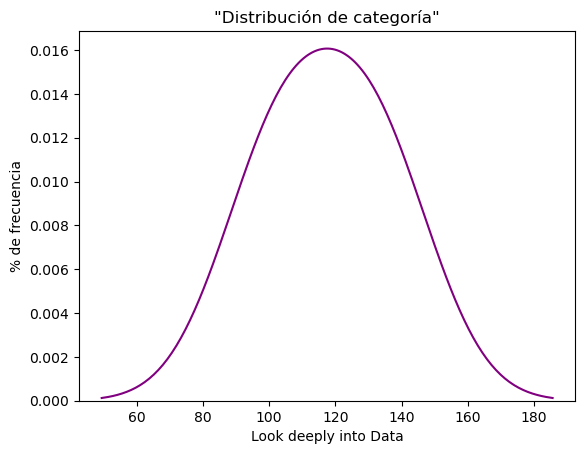

In [56]:
#observando la variable 'look deeply into data'
counts = df_pp['Look deeply into Data'].value_counts()
print(counts)

#plot counts
plt.figure()
sns.distplot(counts, hist = False, color = 'purple')
plt.title('"Distribución de categoría"')
plt.ylabel('% de frecuencia')
plt.show()

In [57]:
X=df_pp.drop('Look deeply into Data', axis=1)
#variable target
y=df_pp['Look deeply into Data']

In [58]:
# Dividiendo datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gboost = GradientBoostingClassifier(n_estimators=100, random_state= 19).fit(X_train, y_train)

In [61]:
gboost_predict=gboost.predict(X_test)
print('El Accuracy usando Boosting es de: {}'.format(accuracy_score(gboost_predict, y_test)))

El Accuracy usando Boosting es de: 0.8169014084507042


In [99]:
import xgboost as xgb

from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)


In [100]:
print('El Accuracy usando XGBoost es de: {}'.format(accuracy_score(preds, y_test)))

El Accuracy usando XGBoost es de: 0.8169014084507042


In [52]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.6 MB/s eta 0:00:00


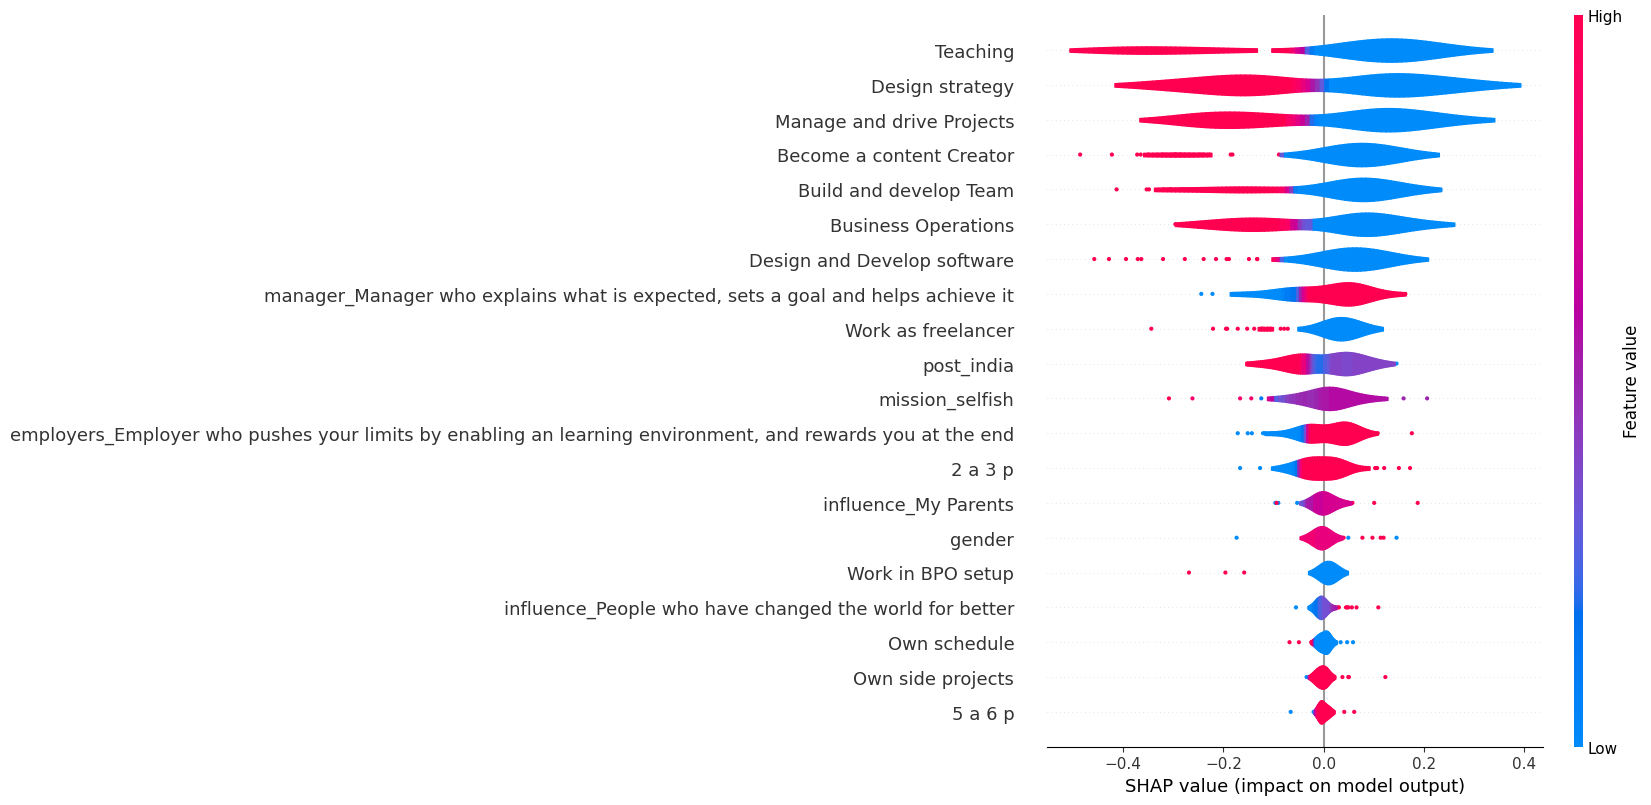

In [101]:
import shap

explainer = shap.Explainer(bst.predict,X_test)
shap_values = explainer(X_test)
# summarize the effects of all the features
shap.summary_plot(shap_values, plot_type='violin')

Teoóricamente AdaBoost no tiende a sobreajustar por lo que es ideal para dataset con variables binarias.

In [104]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


In [105]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [106]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [107]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9577464788732394


In [108]:
y_pred = abc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[40,  0],
       [ 3, 28]])

In [113]:

# Obtener los valores de la matriz de confusión
tn, fp, fn, tp = cm.ravel()

# Calcular la precisión
precision = tp / (tp + fp)

# Calcular la sensibilidad (recall)
sensibilidad = tp / (tp + fn)

# Calcular el F1-score
f1_score = 2 * (precision * sensibilidad) / (precision + sensibilidad)

print("Precision:", precision)
print("Recall:", sensibilidad)
print("F1-score:", f1_score)



Precision: 1.0
Recall: 0.9032258064516129
F1-score: 0.9491525423728813


Permutation explainer: 72it [00:46,  1.16it/s]


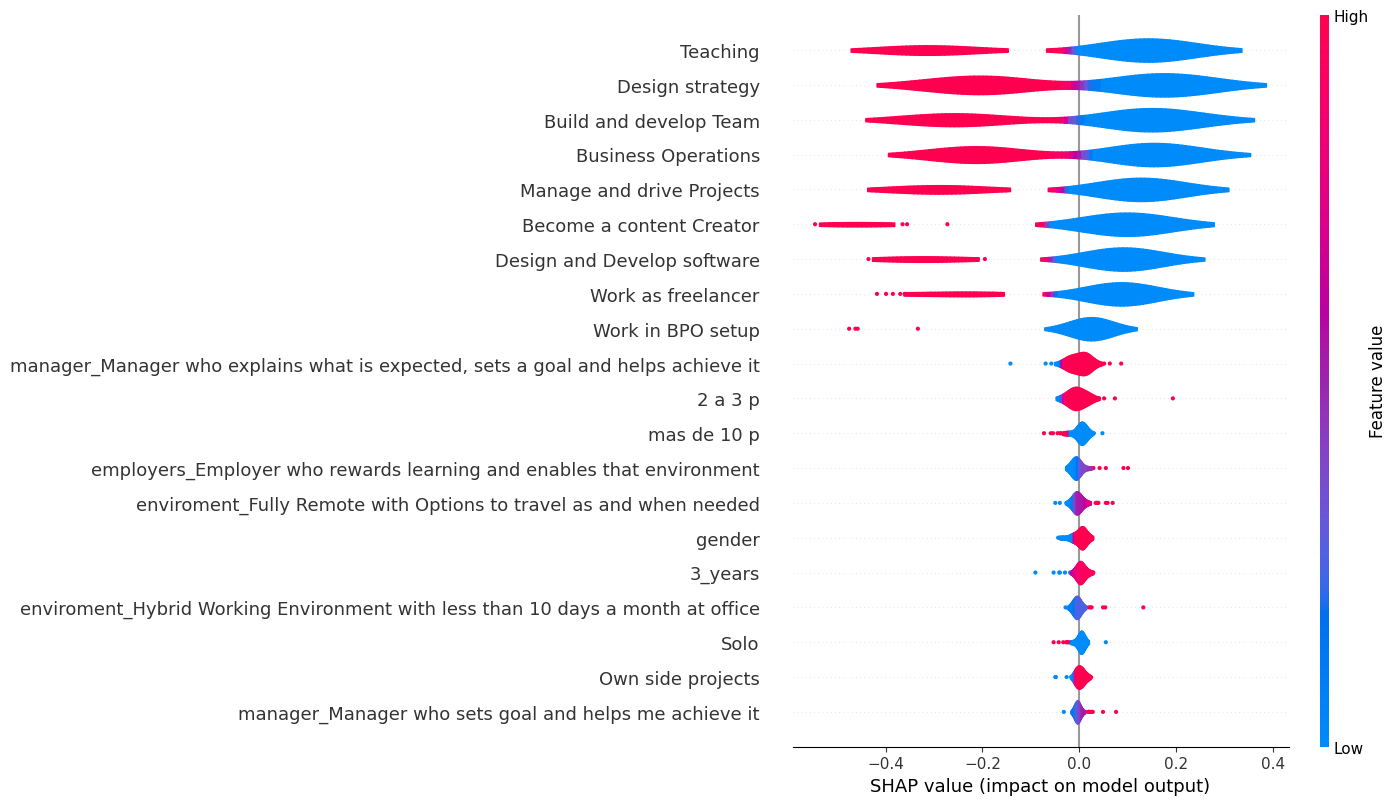

In [109]:
explainer = shap.Explainer(abc.predict,X_test)
shap_values = explainer(X_test)
# summarize the effects of all the features
shap.summary_plot(shap_values, plot_type='violin')